In [ ]:
"""
🧬 Diabeties Prediction using Stacking Ensemble
-------------------------------------------------
Author: Satyam Kumar
Description:
A powerful stacking ensemble model combining CatBoost, XGBoost, and LightGBM
with Logistic Regression as the meta-learner to classify tumors as benign or malignant.
"""
# ===============================================================
# 📦 Import Libraries
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pickle



In [2]:
#==================================================================================
# Load DataSet 
#==================================================================================
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for Null Value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#============================================================================================
# Filling Null Value
#============================================================================================
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())

In [ ]:
#===========================================================================================
# Feature Scaling
#===========================================================================================
from sklearn.preprocessing import StandardScaler 
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
scaler = StandardScaler()
df[cols_with_zero] = scaler.fit_transform(df[cols_with_zero])

In [5]:
#========================================================================================
# Select Feature and Target
#========================================================================================
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [ ]:
#===============================================================================================
# Spliting Training and Testing Data
#===============================================================================================
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
#===========================================================================================
# Handling Imbalance Data
#===========================================================================================
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(x_train,y_train)

In [11]:
#========================================================================================
# Cross validation
#========================================================================================
sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [35]:

#=====================================================================================================
# Model 1: XGBoost
#===================================================================================================== 
xgb = XGBClassifier(random_state=42,eval_metric="logloss",use_label_encoder=False)
param_grid = {
    "n_estimators":[100,150,200],
    "max_depth":[3,4,5],
    "learning_rate":[0.1,0.01,0.5,0.05],
    "colsample_bytree":[0.6,0.7,0.8,0.9],
    "subsample":[0.6,0.7,0.8,0.9],
    "gamma":[0.6,0.7,0.8,0.9],
    "reg_lambda":[1,2,3],
    "reg_alpha":[0.8,1]
}
grid_xgb = RandomizedSearchCV(xgb,param_grid,cv=sk,n_jobs=-1,scoring="roc_auc",
n_iter=20,random_state=42)
grid_xgb.fit(x_res,y_res)
print(grid_xgb.best_score_)
best_xgb = grid_xgb.best_estimator_

0.8759795524691357


In [36]:
#==========================================================================================================
# Model 2: CatBoost
#==========================================================================================================
cat = CatBoostClassifier(eval_metric="AUC",random_seed=42,verbose=0)
param_grid = {
    "iterations":[500,800,100],
    "learning_rate":[0.1,0.5,0.01,0.05],
    "depth":[4,5,6]
}
grid_cat = RandomizedSearchCV(cat,param_grid,cv=sk,n_jobs=-1,scoring="roc_auc"
,n_iter=5,random_state=42)
grid_cat.fit(x_res,y_res)
print(grid_cat.best_score_)
best_cat = grid_cat.best_estimator_

0.8861041666666667


In [37]:
#====================================================================================================
# Model 3: Lightgbm
#====================================================================================================
lgb = LGBMClassifier(random_state=42,verbose=0)
param_grid = {
    "max_depth":[2,3,4,5],
    "n_estimators":[100,150,200],
    "learning_rate":[0.1,0.01,0.5,0.05]

}
grid_lgb = RandomizedSearchCV(lgb,param_grid,cv=sk,n_iter=5
,scoring="roc_auc",n_jobs=-1,random_state=42)
grid_lgb.fit(x_res,y_res)
print(grid_lgb.best_score_)
best_lgb = grid_lgb.best_estimator_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [42]:
#=======================================================================================================
# Model 3:- Logistic Regression(Meta Model)
#=======================================================================================================
lr = LogisticRegression(random_state=42,class_weight="balanced")
param_grid = {
    "max_iter":[500,1000],
    "C":[0.1,0.4]
}
grid_lr = RandomizedSearchCV(lr,param_grid,cv=sk,n_jobs=-1,scoring="roc_auc",
n_iter=5,random_state=42)
grid_lr.fit(x_train,y_train)
best_lr = grid_lr.best_estimator_

In [50]:
model = GaussianNB()
best_nb = model.fit(x_res,y_res)

In [51]:
#==============================================================================================================================
# Build Stacking Model
#==============================================================================================================================
base_model = [
    ("xgb",best_xgb),
    ("lgb",best_lgb),
    ("cat",best_cat),
  
]
meta_model = best_nb
stack = StackingClassifier(estimators=base_model,final_estimator=meta_model,passthrough=True,cv=5,n_jobs=-1)
stack.fit(x_res,y_res)


StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=0.6,
                                              grow_policy=None,
                                              importance_type=None,
                                              interacti...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('lgb',
                                LGBMClassifier(learning_rate=0.05, max_depth=4,
                                               n_estimators=150,
                                               random_state=42, verbose=0)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x00000267BB722030>)],
                   final_estimator=GaussianNB(), n_jobs=-1, passthrough=True)

In [52]:
# Model Evaluation
y_pred = stack.predict(x_test)
y_proba = stack.predict_proba(x_test)[:, 1]
print("\n--- Model Evaluation ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



--- Model Evaluation ---
Test Accuracy: 0.7338
ROC-AUC Score: 0.8138

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77        99
           1       0.60      0.78      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.73      0.74       154



In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[70 29]
 [12 43]]


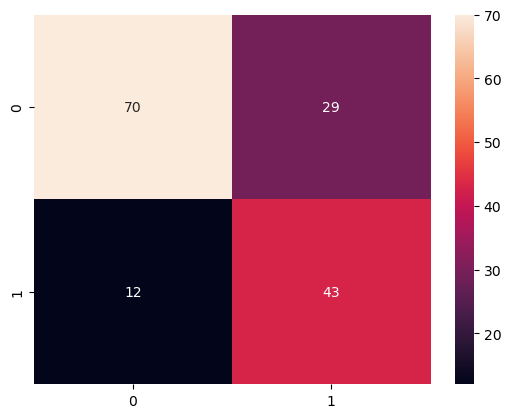

In [ ]:
# Confusion Matrix Plot
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
# Cross Val Score
cv = cross_val_score(stack,x_res,y_res,cv=5,scoring="roc_auc",n_jobs=-1)
cv.mean()


np.float64(0.8833043981481481)

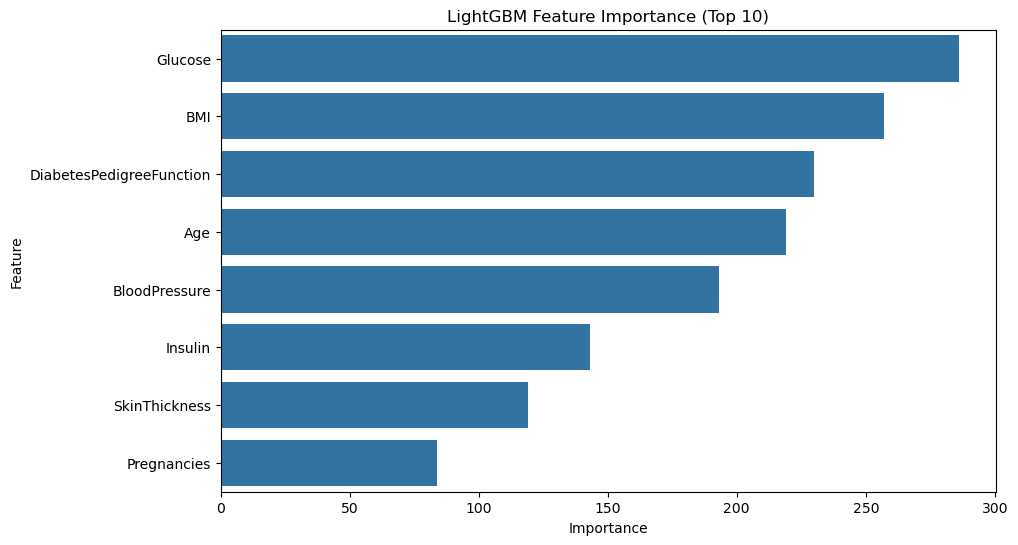

In [ ]:
# Feature Importance
feature_imp = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_lgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('LightGBM Feature Importance (Top 10)')
plt.show()

In [57]:
# Deploy Model
pickle.dump(stack,open("diabeties_nb_stacking.sav","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))